In [2]:
!git clone https://github.com/pranavinn/160121737089_Sid-s-farm_assignment.git

Cloning into '160121737089_Sid-s-farm_assignment'...


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('task_data.xlsx')

In [ ]:

# Handle missing values if necessary
# Example: Fill NaN values in categorical columns with 'Unknown'
data['Assigned To'].fillna('Unknown', inplace=True)
data['Source'].fillna('Unknown', inplace=True)
data['Department'].fillna('Unknown', inplace=True)
data['Issue Category'].fillna('Unknown', inplace=True)

In [ ]:
# Combine date and time columns into datetime objects
data['Created DateTime'] = pd.to_datetime(data['Created Date'] + ' ' + data['Created Time'], dayfirst=True)
data['First Response DateTime'] = pd.to_datetime(data['First Response Time'], dayfirst=True)
data['Resolved DateTime'] = pd.to_datetime(data['Resolved Date'] + ' ' + data['Resolved Time'], dayfirst=True)

<ipython-input-28-0147a1a557b4>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['First Response DateTime'] = pd.to_datetime(data['First Response Time'], dayfirst=True)


In [ ]:
# Calculate FRT and ART in hours
data['FRT'] = (data['First Response DateTime'] - data['Created DateTime']).dt.total_seconds() / 3600
data['ART'] = (data['Resolved DateTime'] - data['Created DateTime']).dt.total_seconds() / 3600

In [ ]:
# Ensure Created DateTime is in 'DD-MM-YYYY' format for consistency
#data['Created DateTime'] = data['Created DateTime'].dt.strftime('%d-%m-%Y %H:%M:%S')

1.Trends with ticket generation and resolution


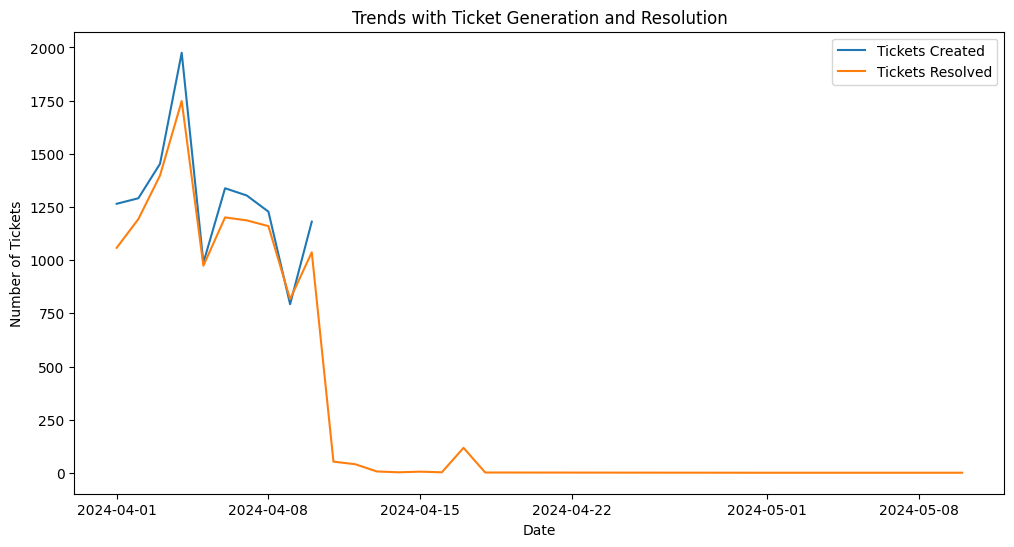

In [ ]:

'''# Trends with ticket generation and resolution
tickets_per_day = data['Created DateTime'].dt.date.value_counts().sort_index()
resolved_per_day = data['Resolved DateTime'].dt.date.value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(tickets_per_day.index, tickets_per_day.values, label='Tickets Created')
plt.plot(resolved_per_day.index, resolved_per_day.values, label='Tickets Resolved')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.title('Trends with Ticket Generation and Resolution')
plt.legend()
plt.show()'''



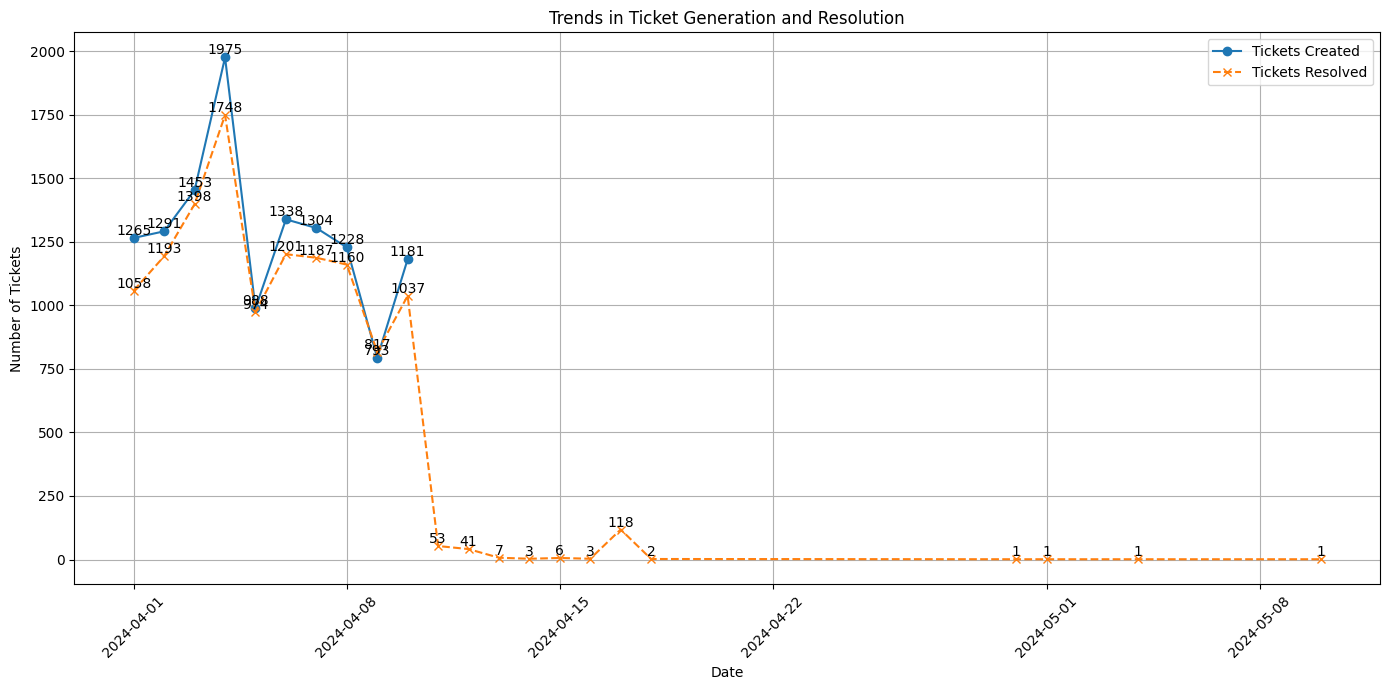

In [ ]:
# Trends with ticket generation and resolution
tickets_per_day = data['Created DateTime'].dt.date.value_counts().sort_index()
resolved_per_day = data['Resolved DateTime'].dt.date.value_counts().sort_index()

plt.figure(figsize=(14, 7))

plt.plot(tickets_per_day.index, tickets_per_day.values, marker='o', linestyle='-', label='Tickets Created')
plt.plot(resolved_per_day.index, resolved_per_day.values, marker='x', linestyle='--', label='Tickets Resolved')

plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.title('Trends in Ticket Generation and Resolution')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Highlight data points
for i in range(len(tickets_per_day)):
    plt.text(tickets_per_day.index[i], tickets_per_day.values[i], str(tickets_per_day.values[i]), ha='center', va='bottom')

for i in range(len(resolved_per_day)):
    plt.text(resolved_per_day.index[i], resolved_per_day.values[i], str(resolved_per_day.values[i]), ha='center', va='bottom')

plt.show()


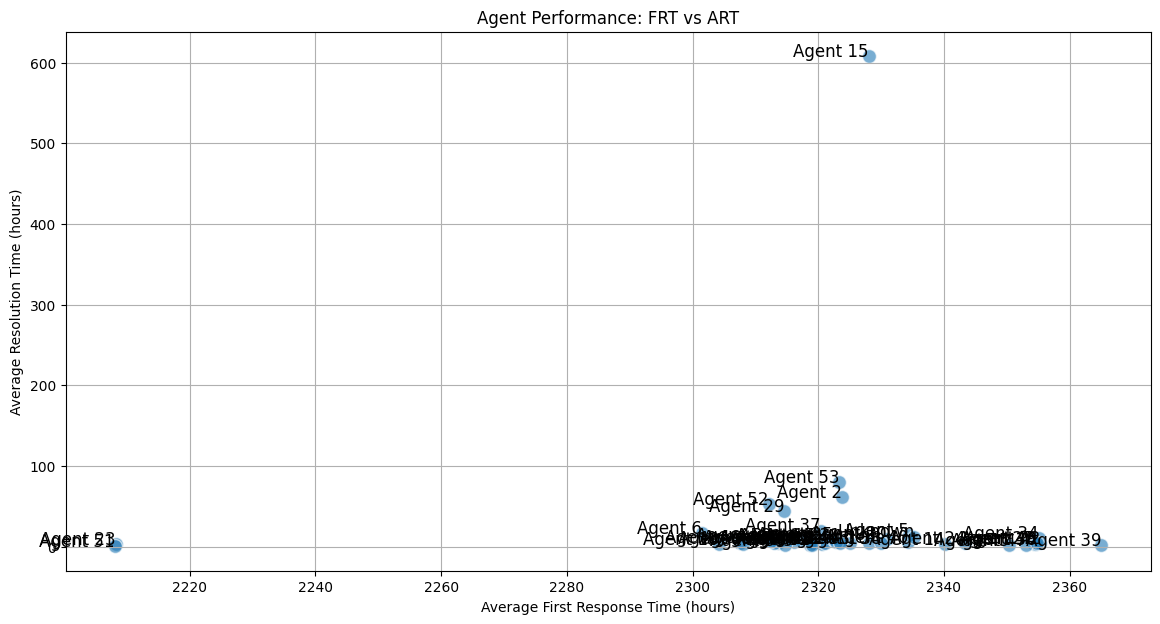

In [ ]:
# Calculate FRT and ART
data['FRT'] = (data['First Response DateTime'] - data['Created DateTime']).dt.total_seconds() / 3600  # Convert to hours
data['ART'] = (data['Resolved DateTime'] - data['Created DateTime']).dt.total_seconds() / 3600  # Convert to hours

# Aggregate FRT and ART by agent
agent_performance = data.groupby('Assigned To').agg({'FRT': 'mean', 'ART': 'mean'}).reset_index()

# Plotting the agent performance
plt.figure(figsize=(14, 7))

plt.scatter(agent_performance['FRT'], agent_performance['ART'], s=100, alpha=0.6, edgecolor='w')

# Annotating the points
for i, row in agent_performance.iterrows():
    plt.text(row['FRT'], row['ART'], row['Assigned To'], fontsize=12, ha='right')

plt.xlabel('Average First Response Time (hours)')
plt.ylabel('Average Resolution Time (hours)')
plt.title('Agent Performance: FRT vs ART')
plt.grid(True)
plt.show()

2.Agent Performance with respect to FRT & ART

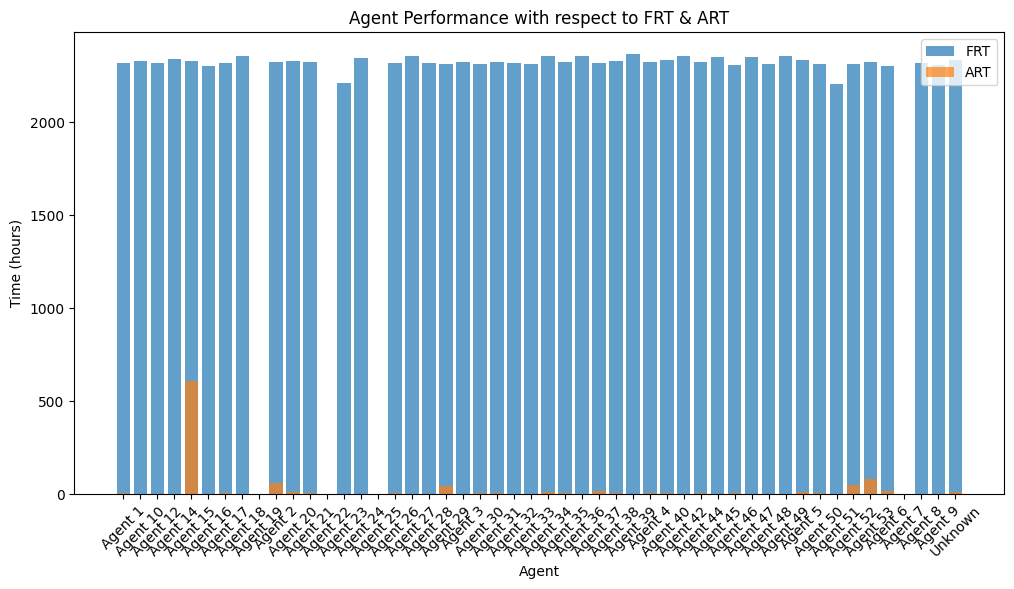

In [ ]:
# Agent Performance with respect to FRT & ART
agent_performance = data.groupby('Assigned To').agg({'FRT': 'mean', 'ART': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
plt.bar(agent_performance['Assigned To'], agent_performance['FRT'], label='FRT', alpha=0.7)
plt.bar(agent_performance['Assigned To'], agent_performance['ART'], label='ART', alpha=0.7)
plt.xlabel('Agent')
plt.ylabel('Time (hours)')
plt.title('Agent Performance with respect to FRT & ART')
plt.legend()
plt.xticks(rotation=45)
plt.show()

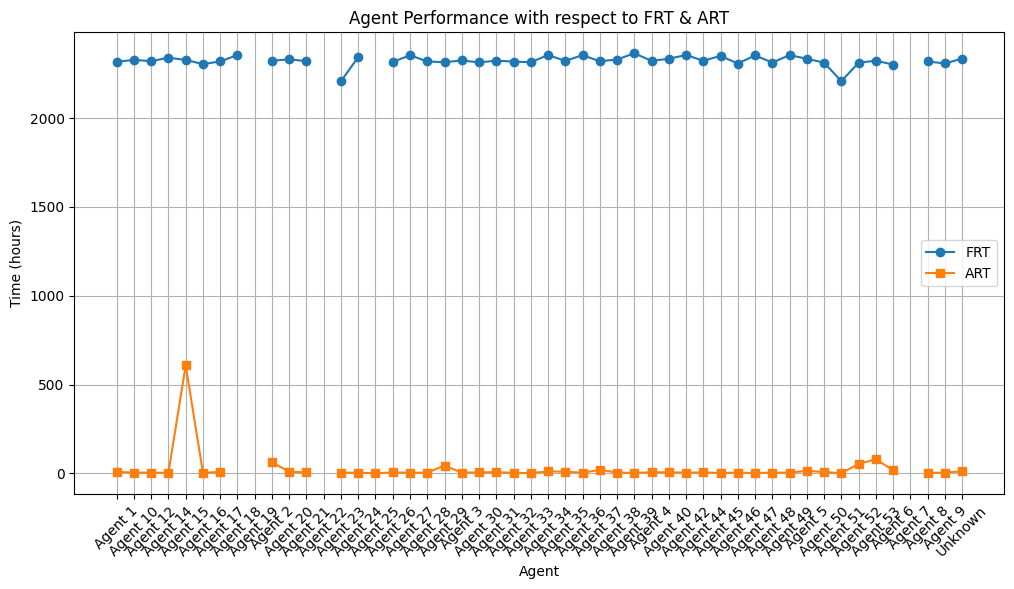

In [ ]:
# Calculate mean FRT and ART for each agent
agent_performance = data.groupby('Assigned To').agg({'FRT': 'mean', 'ART': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(agent_performance['Assigned To'], agent_performance['FRT'], marker='o', linestyle='-', label='FRT')
plt.plot(agent_performance['Assigned To'], agent_performance['ART'], marker='s', linestyle='-', label='ART')
plt.xlabel('Agent')
plt.ylabel('Time (hours)')
plt.title('Agent Performance with respect to FRT & ART')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

3.Ticket contribution of Departments and Issue categories

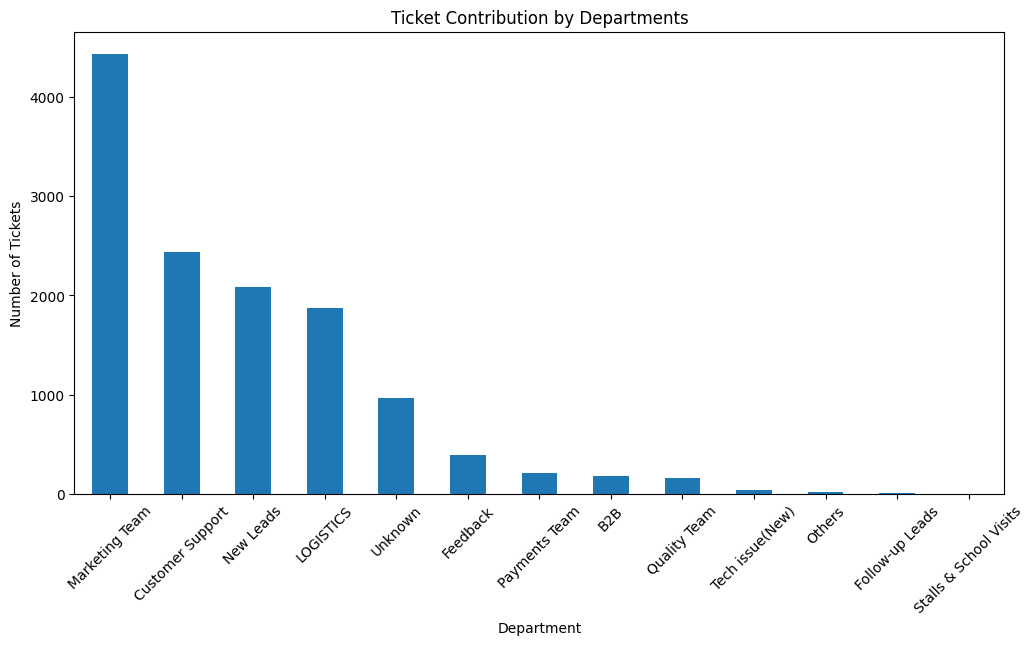

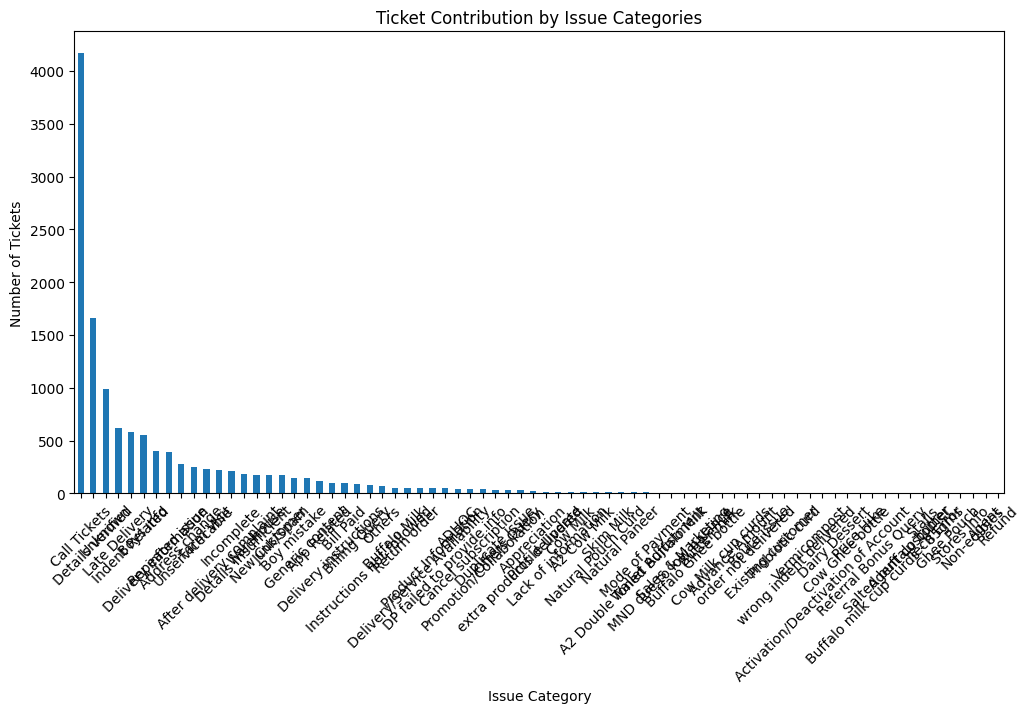

In [ ]:
# Ticket contribution of Departments and Issue categories
department_contribution = data['Department'].value_counts()
issue_category_contribution = data['Issue Category'].value_counts()

plt.figure(figsize=(12, 6))
department_contribution.plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Number of Tickets')
plt.title('Ticket Contribution by Departments')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
issue_category_contribution.plot(kind='bar')
plt.xlabel('Issue Category')
plt.ylabel('Number of Tickets')
plt.title('Ticket Contribution by Issue Categories')
plt.xticks(rotation=45)
plt.show()


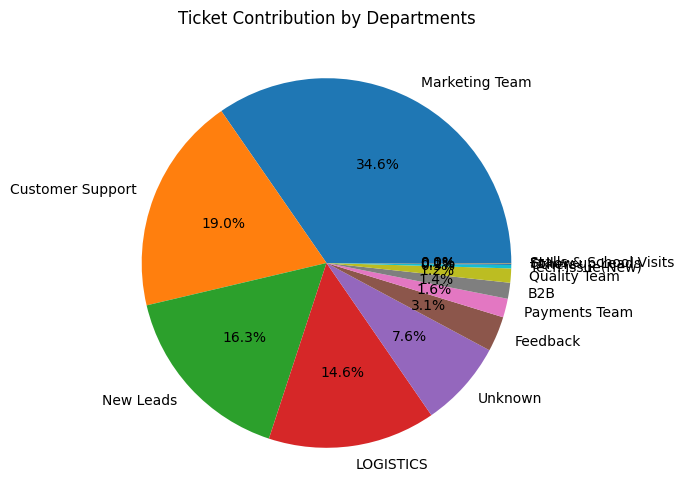

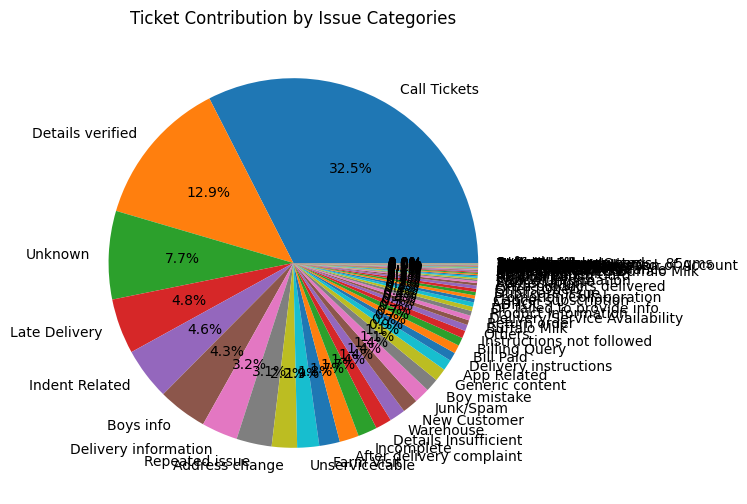

In [ ]:
# Ticket contribution of Departments and Issue categories
department_contribution = data['Department'].value_counts()
issue_category_contribution = data['Issue Category'].value_counts()

plt.figure(figsize=(12, 6))
department_contribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Ticket Contribution by Departments')
plt.ylabel('')  # Hide the y-label
plt.show()

plt.figure(figsize=(12, 6))
issue_category_contribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Ticket Contribution by Issue Categories')
plt.ylabel('')  # Hide the y-label
plt.show()

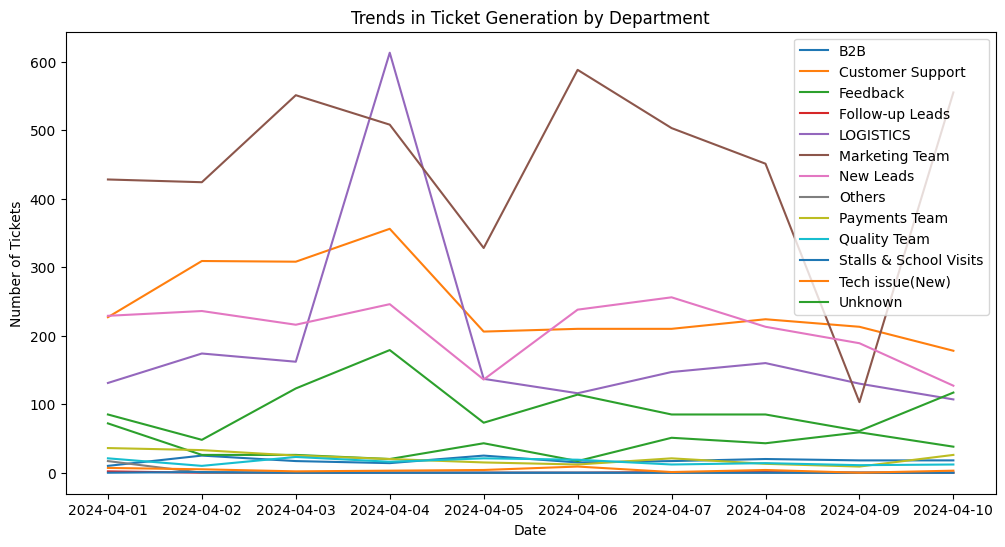

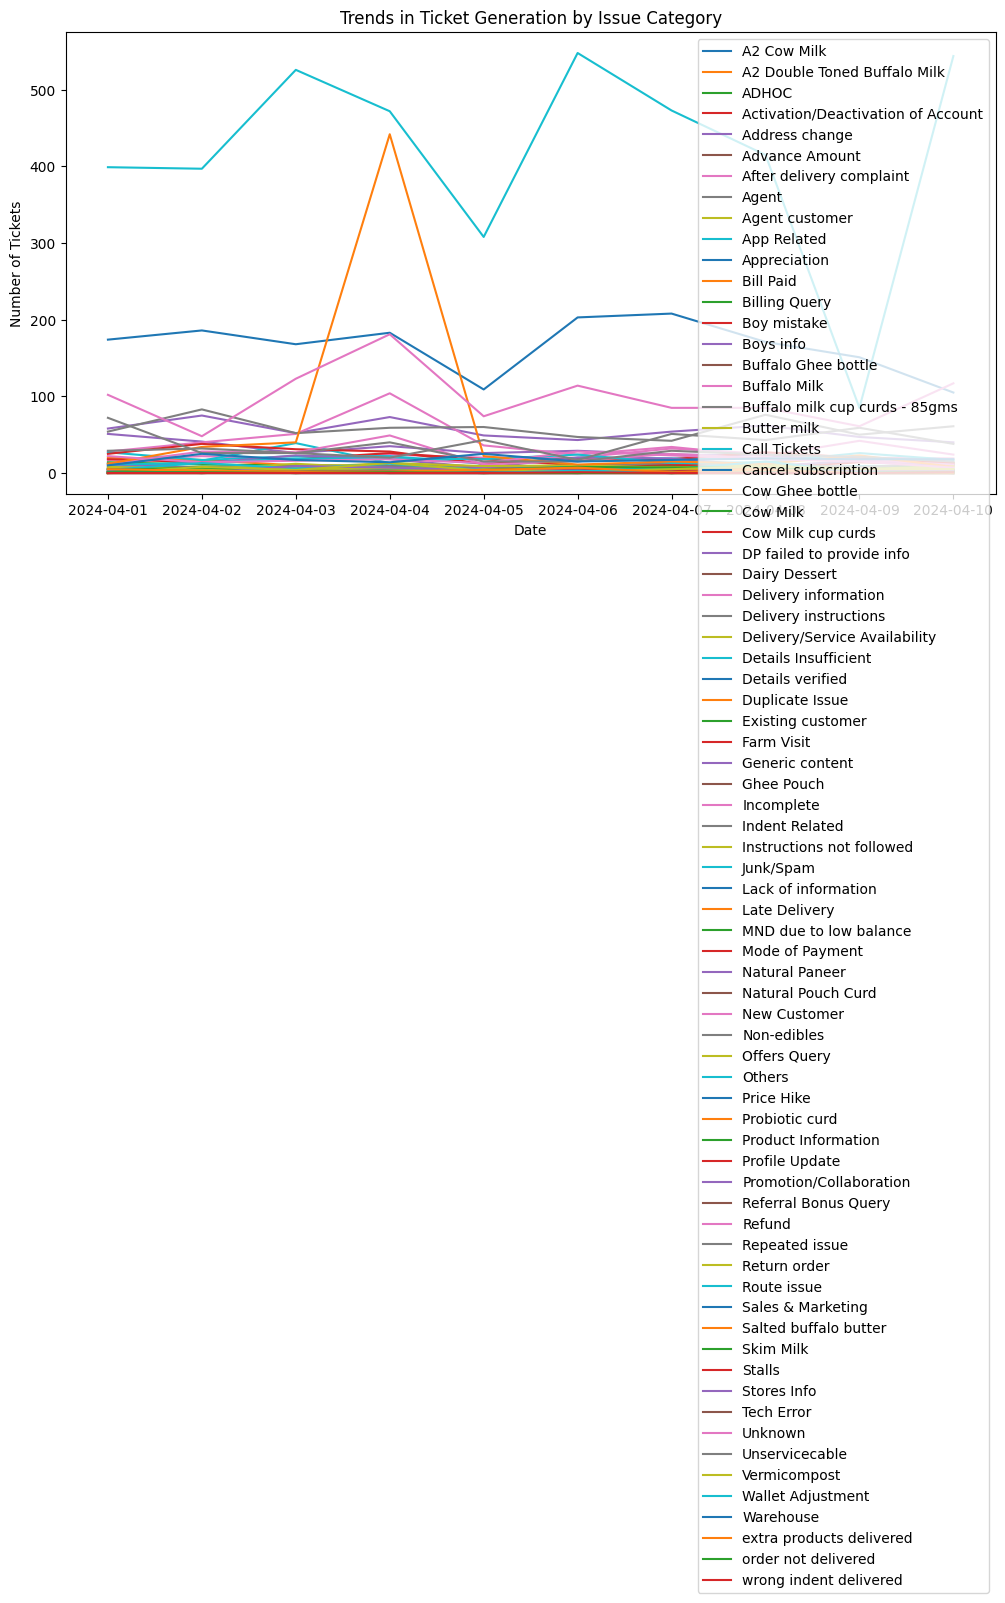

In [ ]:
'''# Correlate trends from ticket generation and resolution to the department and issue category
dept_trends = data.groupby([data['Created DateTime'].dt.date, 'Department']).size().unstack().fillna(0)
issue_trends = data.groupby([data['Created DateTime'].dt.date, 'Issue Category']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
for column in dept_trends.columns:
    plt.plot(dept_trends.index, dept_trends[column], label=column)
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.title('Trends in Ticket Generation by Department')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for column in issue_trends.columns:
    plt.plot(issue_trends.index, issue_trends[column], label=column)
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.title('Trends in Ticket Generation by Issue Category')
plt.legend()
plt.show()'''


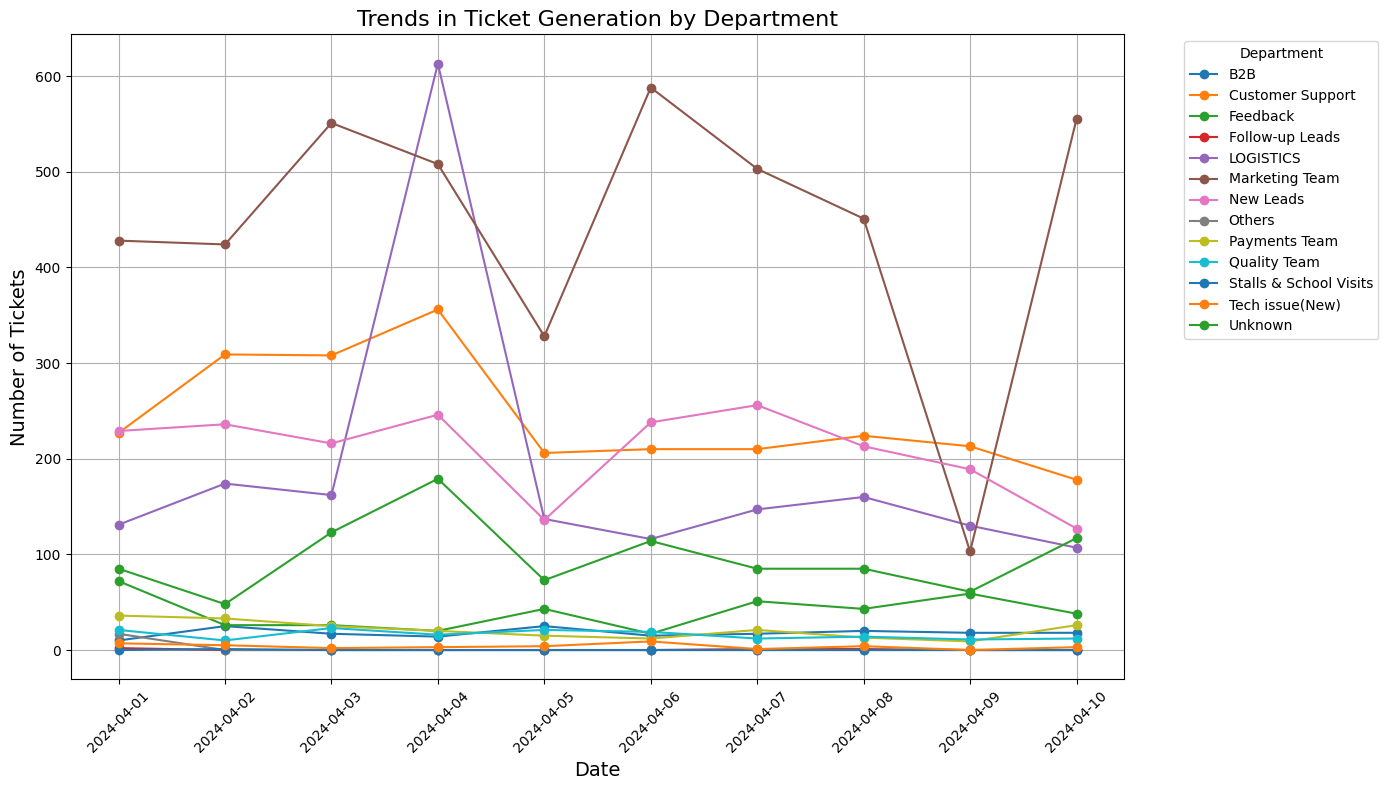

In [ ]:
'''# Correlate trends from ticket generation and resolution to the department and issue category
dept_trends = data.groupby([data['Created DateTime'].dt.date, 'Department']).size().unstack().fillna(0)
issue_trends = data.groupby([data['Created DateTime'].dt.date, 'Issue Category']).size().unstack().fillna(0)

# Plotting Trends in Ticket Generation by Department
plt.figure(figsize=(14, 8))
for column in dept_trends.columns:
    plt.plot(dept_trends.index, dept_trends[column], marker='o', label=column)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tickets', fontsize=14)
plt.title('Trends in Ticket Generation by Department', fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()'''

4.Correlate trends from ticket generation and resolution to the department and issue
category

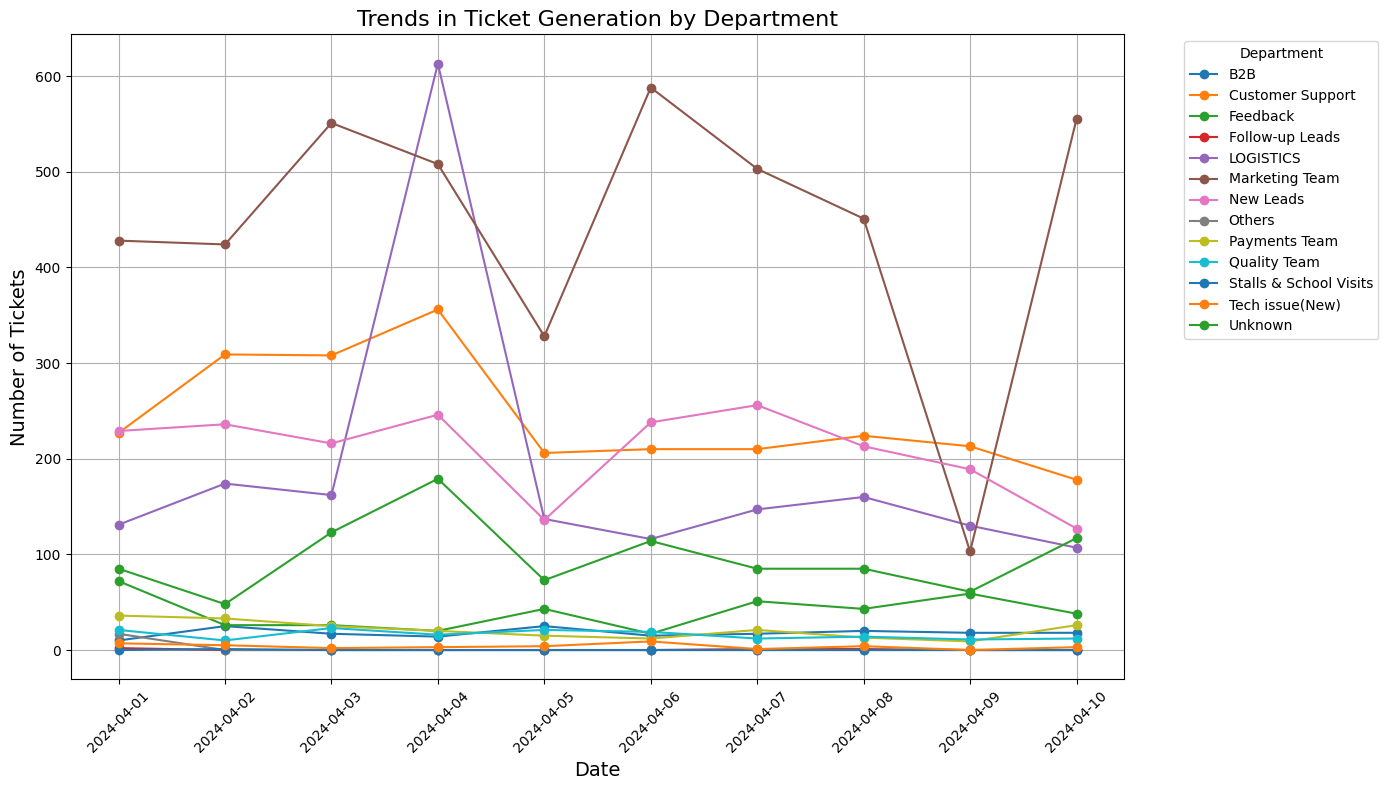

<ipython-input-41-dc670c39d6d8>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


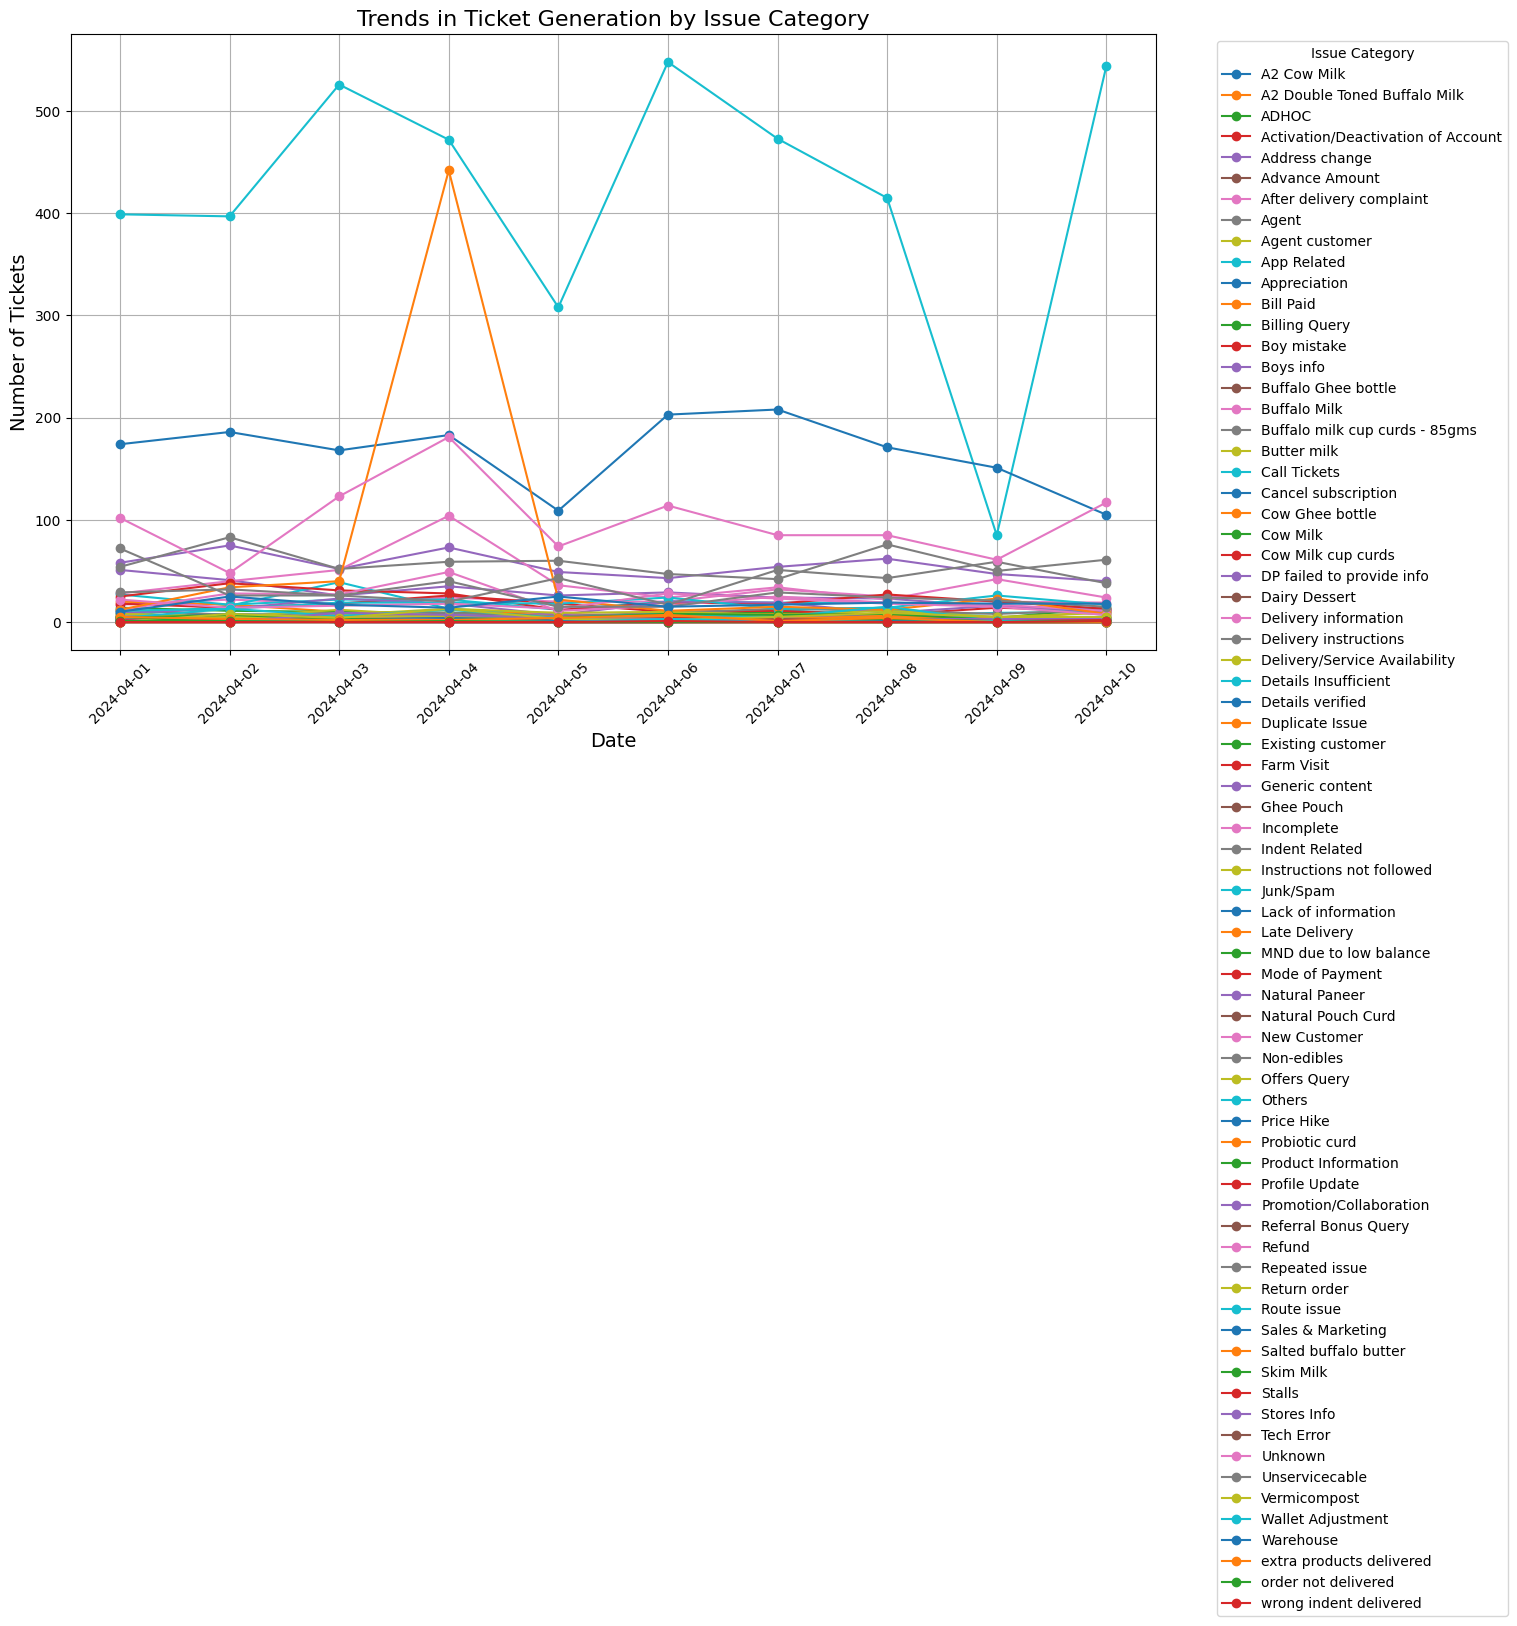

In [ ]:
plt.figure(figsize=(14, 8))
for column in dept_trends.columns:
    plt.plot(dept_trends.index, dept_trends[column], marker='o', label=column)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tickets', fontsize=14)
plt.title('Trends in Ticket Generation by Department', fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Trends in Ticket Generation by Issue Category
plt.figure(figsize=(14, 8))
for column in issue_trends.columns:
    plt.plot(issue_trends.index, issue_trends[column], marker='o', label=column)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tickets', fontsize=14)
plt.title('Trends in Ticket Generation by Issue Category', fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='Issue Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

5.Correlate FRT and ART data to the department and issue category

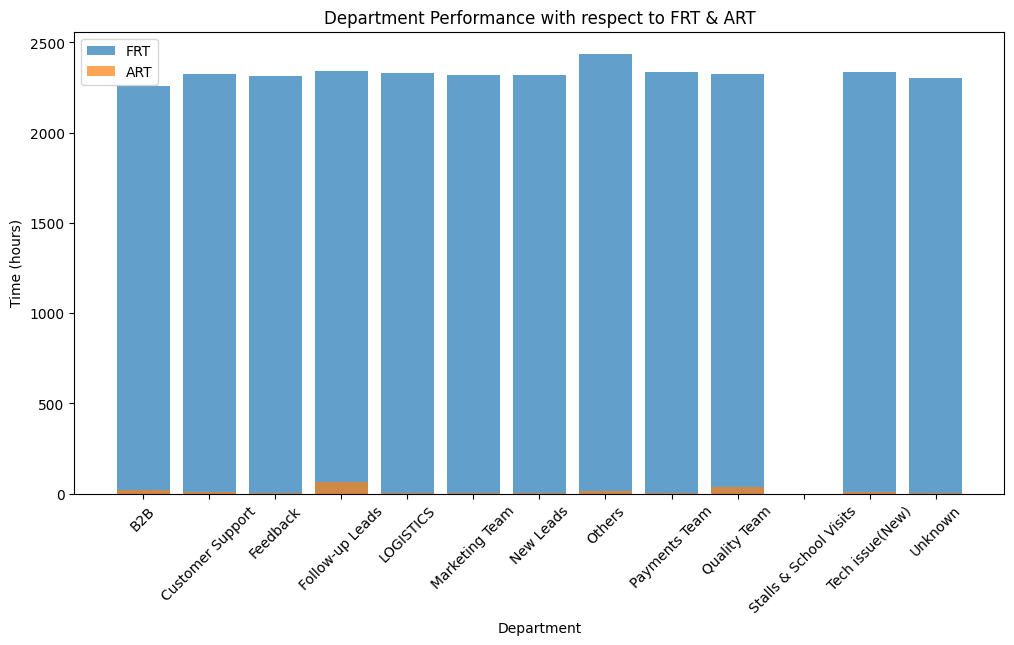

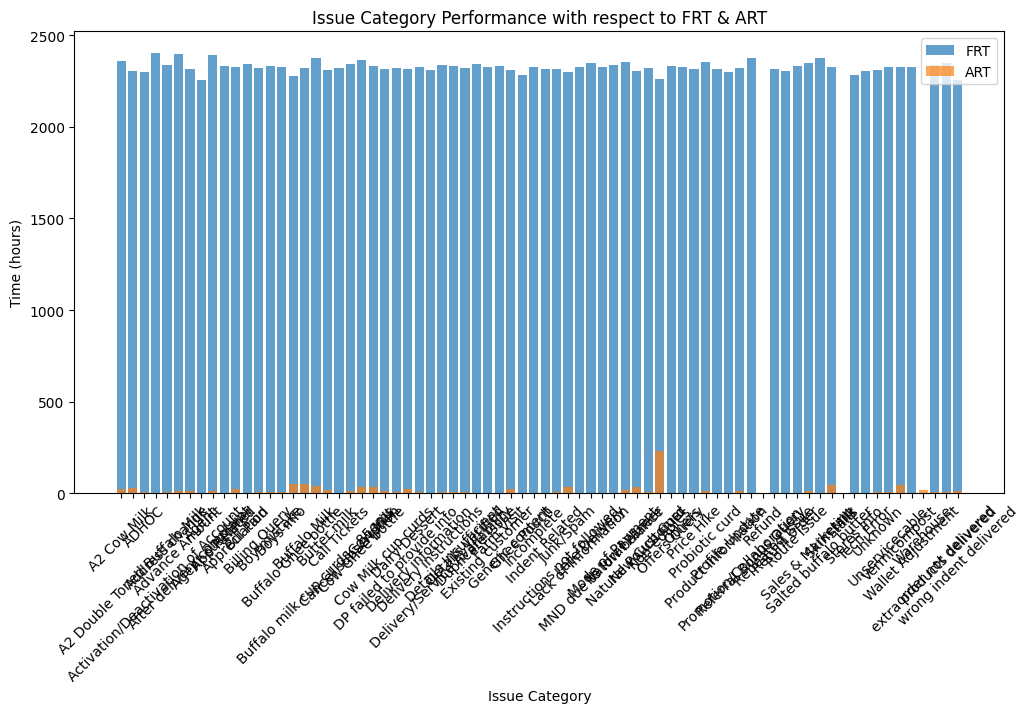

In [ ]:
# Correlate FRT and ART data to the department and issue category
dept_performance = data.groupby('Department').agg({'FRT': 'mean', 'ART': 'mean'}).reset_index()
issue_performance = data.groupby('Issue Category').agg({'FRT': 'mean', 'ART': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
plt.bar(dept_performance['Department'], dept_performance['FRT'], label='FRT', alpha=0.7)
plt.bar(dept_performance['Department'], dept_performance['ART'], label='ART', alpha=0.7)
plt.xlabel('Department')
plt.ylabel('Time (hours)')
plt.title('Department Performance with respect to FRT & ART')
plt.legend()
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(issue_performance['Issue Category'], issue_performance['FRT'], label='FRT', alpha=0.7)
plt.bar(issue_performance['Issue Category'], issue_performance['ART'], label='ART', alpha=0.7)
plt.xlabel('Issue Category')
plt.ylabel('Time (hours)')
plt.title('Issue Category Performance with respect to FRT & ART')
plt.legend()
plt.xticks(rotation=45)
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 4.5 MB/s eta 0:00:00
